# **1. 벡터 데이터베이스**
벡터 데이터베이스(Vector Database)는 텍스트, 이미지, 오디오와 같은 데이터를 고차원 벡터 형태로 변환해 저장하고, 이 벡터 간의 유사도를 빠르게 검색할 수 있도록 최적화된 데이터베이스입니다. 일반적인 관계형 데이터베이스가 정확한 값 기반 검색(SQL 쿼리 등)에 적합하다면, 벡터 데이터베이스는 의미적 유사성(semantic similarity)에 기반한 검색을 지원하여 예를 들어 "강아지"와 "개"처럼 다른 표현이라도 비슷한 의미의 데이터를 찾아낼 수 있습니다. 이를 위해 코사인 유사도, 내적(dot product), 유클리드 거리와 같은 수학적 거리 계산을 활용하며, 대규모 임베딩(embedding) 데이터를 효율적으로 관리하고 검색할 수 있어 추천 시스템, 검색 엔진, 생성형 AI의 RAG(Retrieval-Augmented Generation) 등에 널리 활용됩니다.

###크로마디비
크로마디비(ChromaDB)는 대표적인 오픈소스 벡터 데이터베이스로, 문서·이미지·코드 등 다양한 데이터를 임베딩 벡터로 변환해 저장하고, 이를 빠르게 검색할 수 있도록 설계된 시스템입니다. 파이썬 기반으로 사용이 간편하며, LangChain 같은 LLM 프레임워크와 잘 통합되어 RAG(Retrieval-Augmented Generation) 구조를 쉽게 구축할 수 있습니다. 내부적으로는 벡터 인덱싱과 메타데이터 저장을 함께 지원하여, 단순히 유사도 검색뿐 아니라 조건 필터링과 결합된 검색도 가능합니다. 무료로 가볍게 실행할 수 있고, 로컬 환경부터 클라우드까지 유연하게 확장할 수 있어 학습용이나 실무용 AI 검색 엔진 구축에 많이 활용됩니다.

<a href="https://www.trychroma.com/">[링크]</a>

In [ ]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [ ]:
!pip -q install langchain_community
!pip -q install langchain_experimental
!pip -q install langchain_openai
!pip -q install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 7.2 MB/s eta 0:00:00


# **2. 청크**
청크(Chunk)는 긴 텍스트나 문서를 작은 단위로 나눈 조각을 의미하며, 주로 자연어 처리와 RAG(Retrieval-Augmented Generation) 같은 작업에서 사용됩니다. 대형 언어모델은 한 번에 처리할 수 있는 토큰 수에 한계가 있기 때문에 문서를 일정한 길이로 분할하여 임베딩 벡터로 변환하고, 이후 검색이나 질의 응답 시 필요한 청크만 불러와 모델에 전달하는 방식으로 효율성과 정확성을 높입니다. 청크는 단순히 일정 글자 수나 토큰 수로 나누기도 하지만, 문단·문장 단위 등 의미 단위로 나누어야 검색 품질이 좋아지며, 결국 청크는 방대한 데이터를 모델이 다룰 수 있는 크기로 잘게 나눈 최소 단위라고 할 수 있습니다.

### SemanticChunker
SemanticChunker는 텍스트를 단순히 일정한 길이로 자르는 방식이 아니라, 문장의 의미적 맥락을 고려해 자연스럽게 분할하는 청크 생성 기법입니다. 즉, 문장이나 문단의 의미가 단절되지 않도록 문맥 단위로 텍스트를 나누어 임베딩과 검색의 정확도를 높여줍니다. 이를 통해 RAG(Retrieval-Augmented Generation) 구조에서 모델이 보다 관련성 높은 정보를 검색할 수 있으며, 불필요하게 잘려나간 조각이나 중복된 정보 전달을 줄일 수 있습니다. 따라서 SemanticChunker는 의미 기반 검색과 대규모 문서 처리에서 효율성과 정밀도를 동시에 향상시키는 중요한 도구로 활용됩니다.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

In [ ]:
file_path = "/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf"

In [ ]:
loader = PyPDFLoader(file_path)
pages = []

# 비동기 한번에 전부 읽지 않고 페이지 단위로 스트리밍
async for page in loader.alazy_load():
    pages.append(page)

text_splitter = SemanticChunker(OpenAIEmbeddings())

# 페이지별 문서를 여러 개의 의미 청크로 쪼개
docs = text_splitter.split_documents(pages)

print(f"총 {len(docs)}개 만큼의 문서로 청킹되었습니다.")
print([len(i.page_content) for i in docs])

총 33개 만큼의 문서로 청킹되었습니다.
[22, 922, 19, 1562, 1447, 1645, 1682, 19, 1291, 1777, 1801, 1528, 1656, 1755, 78, 1659, 1055, 19, 1545, 1662, 1690, 1628, 91, 1684, 19, 1619, 10, 1447, 1678, 58, 1616, 2460, 225]


In [ ]:
# 각 청크의 메타데이터 및 내용 출력
for i in docs:
    print(i.metadata)       # 문서의 메타데이터 출력 (예: 페이지 번호 등)
    print(i.page_content)   # 분할된 청크의 내용 출력
    print("-" * 100)        # 구분선 출력

{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 0, 'page_label': '1'}
2025년4월호인공지능 산업의 최신 동향
----------------------------------------------------------------------------------------------------
{'producer': 'Hancom PDF 1.3.0.505', 'creator': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'author': 'dj', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'total_pages': 29, 'page': 1, 'page_label': '2'}
SPRi AI Brief2025년 4월호
2
CONTENTS정책･법제∙2025년 중국 양회의 정부 업무보고, AI 플러스 행동의 지속 추진을 천명2∙중국 정부, 2025년 9월부터 AI 생성·합성물 표시 의무화 규정 시행 

# **3. 벡터 리트리버**
벡터 리트리버(Vector Retriever)는 사용자의 질의(Query)를 임베딩 벡터로 변환한 뒤, 벡터 데이터베이스에 저장된 청크(Chunk) 벡터들과의 유사도를 계산하여 가장 관련성 높은 결과를 찾아주는 구성 요소입니다. 즉, “검색기” 역할을 하는데, 단순히 키워드 일치를 찾는 것이 아니라 의미적 유사성을 기반으로 정보를 불러옵니다. 이를 위해 코사인 유사도, 내적(dot product), 유클리드 거리 등의 수학적 방법을 활용하며, 검색된 결과는 LLM과 결합되어 RAG(Retrieval-Augmented Generation) 같은 구조에서 모델의 답변 품질을 높이는 데 쓰입니다. 쉽게 말해, 벡터 리트리버는 “의미를 이해하는 검색 엔진”이라고 할 수 있습니다.

### from_documents

* documents (List[Document]): 벡터 저장소에 추가할 문서 리스트
* embedding (Optional[Embeddings]): 임베딩 함수. 기본값은 None
* ids (Optional[List[str]]): 문서 ID 리스트. 기본값은 None
* collection_name (str): 생성할 컬렉션 이름.
* persist_directory (Optional[str]): 컬렉션을 저장할 디렉토리. 기본값은 None
* client_settings (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
* client (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
* collection_metadata (Optional[Dict]): 컬렉션 구성 정보. 기본값은 None

In [ ]:
!pip -q install langchain_chroma
!pip -q install -U langchain langchain-chroma langchain-openai chromadb
!pip -q install -U "opentelemetry-api==1.26.0" \
              "opentelemetry-sdk==1.26.0" \
              "opentelemetry-exporter-otlp-proto-grpc==1.26.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

In [ ]:
# query = "카나나의 테크니컬 리포트는 어떤 내용인가요?"
# query = "에이전트 SDK는 어떤 기능을 제공하나요?"
query = "딥마인드가 발표한 로봇AI 모델은?"

results = vectorstore.similarity_search(query, k=1)
results

[Document(id='94b37a2e-07da-4840-a342-e9effcbc2ecb', metadata={'page': 17, 'author': 'dj', 'total_pages': 29, 'producer': 'Hancom PDF 1.3.0.505', 'creationdate': '2025-04-04T07:23:56+09:00', 'moddate': '2025-04-04T07:23:56+09:00', 'creator': 'Hancom PDF 1.3.0.505', 'pdfversion': '1.4', 'page_label': '18', 'source': '/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf'}, page_content='SPRi AI Brief2025년 4월호\n16\n구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개\nKEY Contents\n£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업

In [ ]:
print(results[0].page_content)

SPRi AI Brief2025년 4월호
16
구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개
KEY Contents
£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의 명령을 이해하고 다양한 언어로 답변할 수 있으며, 복잡한 다단계 작업도 수행 가능∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 다양한 환경에서 로봇과 협력할 수 있도록 지원∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며, 로봇 유형별로 쉽게 적응할 수 있도록 설계되어 많은 연구실에서 사용되는 양팔 로봇 플랫폼뿐 아니라 휴머노이드 로봇과 같은 복잡한 

In [ ]:
# '벡터스토어'를 검색기로 바꿔줌, 가장 유사한 문서 1개만 찾음
vector_retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
relevant_doc = vector_retriever.invoke(query)
print(relevant_doc)

[Document(id='94b37a2e-07da-4840-a342-e9effcbc2ecb', metadata={'total_pages': 29, 'page_label': '18', 'source': '/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf', 'creationdate': '2025-04-04T07:23:56+09:00', 'moddate': '2025-04-04T07:23:56+09:00', 'pdfversion': '1.4', 'creator': 'Hancom PDF 1.3.0.505', 'page': 17, 'producer': 'Hancom PDF 1.3.0.505', 'author': 'dj'}, page_content='SPRi AI Brief2025년 4월호\n16\n구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개\nKEY Contents\n£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업

In [ ]:
print(relevant_doc[0].page_content)

SPRi AI Brief2025년 4월호
16
구글 딥마인드, 로봇 특화 AI 모델 ‘제미나이 로보틱스’ 개발n구글 딥마인드는 제미나이 2.0 기반의 시각-언어-행동 모델로 로봇 직접 제어를 위한 물리적 동작이 출력으로 추가된 로봇 특화 AI 모델 ‘제미나이 로보틱스’를 공개n구글 딥마인드는 물리적 세계에 대한 이해 능력을 개선해 로봇 제어에 필요한 모든 추론 단계를 즉각 수행할 수 있는 비전-언어 모델 ‘제미나이 로보틱스-ER’도 공개
KEY Contents
£‘제미나이 로보틱스’, 학습 과정에서 접하지 못한 작업도 즉각 수행하는 범용성 보유n구글 딥마인드(Google Deepmind)가 2025년 3월 12일 로봇 개발에 특화된 AI 모델 ‘제미나이 로보틱스(Gemini Robotics)’를 공개∙제미나이 2.0을 기반으로 구축된 제미나이 로보틱스는 첨단 시각-언어-행동(VLA) 모델로, 로봇을 직접 제어하기 위해 물리적 행동을 새로운 출력 형태로 추가했으며, 학습 과정에서 접하지 못한 새로운 물체나 환경에서도 기존에 학습한 지식을 응용해 다양한 작업을 즉각 수행하는 범용성을 보유* Vision-Language-Action: 시각, 언어, 행동을 통합적으로 이해하고 처리하는 AI 모델∙구글 딥마인드는 종합적인 범용성 벤치마크에서 제미나이 로보틱스가 다른 첨단 시각-언어-행동 모델보다 평균 두 배 이상의 성능 향상을 보였다고 보고*n구글 딥마인드에 따르면 제미나이 로보틱스는 제미나이의 언어 이해 능력을 바탕으로 일상적 대화체의 명령을 이해하고 다양한 언어로 답변할 수 있으며, 복잡한 다단계 작업도 수행 가능∙주변 환경을 지속적으로 모니터링하여 환경이나 명령의 변화를 감지하고 즉시 행동을 수정할 수 있어, 다양한 환경에서 로봇과 협력할 수 있도록 지원∙종이접기처럼 섬세한 운동 능력과 정밀한 조작을 요구하는 작업을 수행할 수 있으며, 로봇 유형별로 쉽게 적응할 수 있도록 설계되어 많은 연구실에서 사용되는 양팔 로봇 플랫폼뿐 아니라 휴머노이드 로봇과 같은 복잡한 

### 앙상블 리트리버
앙상블 리트리버(Ensemble Retriever)는 하나의 검색 방식에만 의존하지 않고, 여러 종류의 리트리버를 조합해 더 정확하고 풍부한 검색 결과를 제공하는 방법입니다. 예를 들어 키워드 기반의 전통적 BM25 리트리버와 의미 기반의 벡터 리트리버를 함께 사용하면, 단어가 정확히 일치하는 문서뿐 아니라 의미적으로 관련 있는 문서도 함께 찾아낼 수 있습니다. 이렇게 서로 다른 리트리버의 강점을 결합하면 검색 누락을 줄이고, 다양한 관점에서 문서를 확보할 수 있어 RAG(Retrieval-Augmented Generation) 구조에서 더욱 신뢰도 높은 응답을 생성하는 데 유용합니다.

### BM25 리트리버
BM25 리트리버는 전통적인 정보 검색 기법 중 하나로, 사용자의 질의(Query)와 문서 간의 키워드 일치 정도를 계산해 관련성이 높은 문서를 찾아주는 방식입니다. 기본적으로 단어 빈도(Term Frequency), 역문서 빈도(Inverse Document Frequency), 그리고 문서 길이를 고려해 점수를 매기며, 특정 단어가 질의에 많이 등장하거나 드문 단어일수록 가중치를 높게 주어 검색 정확도를 높입니다. 벡터 리트리버처럼 의미적 유사성을 직접 파악하지는 못하지만, 빠르고 해석 가능한 결과를 제공하기 때문에 대규모 문서 검색이나 키워드 중심 검색에서 여전히 많이 활용되며, 종종 벡터 리트리버와 결합해 앙상블 리트리버로 사용됩니다.

In [ ]:
!pip -q install rank_bm25

In [ ]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

bm25_retriever = BM25Retriever.from_documents(
    docs,
)
bm25_retriever.k = 1

In [ ]:
ensemble_retriever = EnsembleRetriever(
    # BM25에 더 높은 비중(70%)을 주고, 임베딩 검색은 보조(30%)로 섞음
    retrievers=[bm25_retriever, vector_retriever],
    weights=[0.7, 0.3],
)

In [ ]:
# query = "깊이 업스케일링 (Depth UP-Scaling)"
# query = "카나나의 테크니컬 리포트는 어떤 내용인가요?"
# query = "에이전트 SDK는 어떤 기능을 제공하나요?"
query = "에이전트 SDK"

In [ ]:
ensemble_result = ensemble_retriever.invoke(query)
bm25_result = bm25_retriever.invoke(query)
vector_result = vector_retriever.invoke(query)

In [ ]:
print("[Ensemble Retriever]")
for doc in ensemble_result:
    print(f"Ensemble Retriever Content: {doc.page_content}")
    print('----------------------------')

print("[BM25 Retriever]")
for doc in bm25_result:
    print(f"BM25 Retriever Content: {doc.page_content}")
    print('----------------------------')

print("[Vector Retriever]")
for doc in vector_result:
    print(f"Vector Retriever Content: {doc.page_content}")
    print('----------------------------')

[Ensemble Retriever]
Ensemble Retriever Content: SPRi AI Brief2025년 4월호
8
 오픈AI, AI 에이전트 구축 지원 도구와 신규 음성·이미지 생성 모델 출시n오픈AI가 AI 에이전트의 효율적 구축을 지원하는‘Response API’와 다중 에이전트 기반의 업무 프로세스 조율을 지원하는 ‘에이전트 SDK’를 출시n오픈AI는 개발자 대상으로 API에서 음성인식 및 음성합성 모델 3종을 공개하는 한편, GPT-4o를 기반으로 텍스트와 이미지 생성을 통합한 AI 모델도 공개
KEY Contents
£오픈AI의 Response API, 웹 검색과 파일 검색, 컴퓨터 사용 기능을 지원 n오픈AI가 2025년 3월 11일 개발자의 효율적인 AI 에이전트 구축을 지원하는 ‘Response API’를 공개∙Response API는 여러 API나 외부 공급업체를 사용하지 않고 오픈AI의 모델과 기본 제공 도구를 앱에 쉽게 결합하려는 개발자를 위한 API로, 웹 검색, 파일 탐색, 컴퓨터 사용(Computer Use)*등 기능을 지원* 브라우저 기반의 실제 작업(예: 파일 다운로드, 웹 검색 등)을 수행할 수 있는 오픈AI의 에이전트 기능∙오픈AI는 대화형 응답을 생성하는 ‘Chat Completions API’ 및 AI 어시스턴트 생성과 관리를 지원하는 ‘Assistants API’의 기능을 결합해 Response API를 출시했으며, 웹 검색과 파일 검색, 컴퓨터 사용 기능을 통해 AI 모델이 현실의 복잡한 작업을 수행할 수 있다고 설명n오픈AI는 Response API와 함께 개발자가 다중 에이전트 기반의 업무 프로세스 조율을 간소화할 수 있도록 지원하는 ‘에이전트 SDK*’도 공개* Software Development Kit: 특정 플랫폼이나 API를 쉽게 사용할 수 있도록 제공하는 도구 모음∙오픈AI는 2024년 10월 공개한 실험적 SDK ‘Swarm’을 바탕으로 LLM의 손쉬운 구성, 에이전트 간 지능적 연계 지

In [ ]:
!pip -q install langgraph

In [ ]:
from langgraph.graph import StateGraph, MessagesState

class State(MessagesState):
    context: str

graph_builder = StateGraph(State)

In [ ]:
from langchain_core.messages import HumanMessage

def retriever(state: State):
    """
    Retrieve the relevant document and return the content.
    """
    print("##### RETRIEVER #####")
    query = state["messages"][0].content
    ensemble_result = ensemble_retriever.invoke(query)

    content = ensemble_result[0].page_content
    print("[CONTEXT]\n", content)

    return {"context" : content, "messages": [HumanMessage(content=content)]}

# **4. 랭체인 허브**
<a title="랭체인 허브" href="https://smith.langchain.com/hub" target="_blank" rel="noopener">랭체인 허브(LangChain Hub)</a>는 개발자와 연구자들이 프롬프트(Prompt), 체인(Chain), 에이전트(Agent) 같은 LLM 관련 리소스를 공유하고 재사용할 수 있도록 만든 오픈 플랫폼입니다. 사용자는 자신이 만든 프롬프트 템플릿을 업로드해 다른 사람과 공유할 수 있고, 다른 사람이 만든 검증된 프롬프트를 hub.pull() 같은 방식으로 손쉽게 불러와 활용할 수 있습니다. 이를 통해 매번 새롭게 프롬프트를 설계할 필요 없이 빠르게 실험하고 협업할 수 있으며, 다양한 검색 기능을 제공해 특정 목적(Q&A, 요약, RAG 등)에 맞는 템플릿을 쉽게 찾을 수 있습니다. 결국 랭체인 허브는 LLM 애플리케이션 개발을 가속화하는 중앙 저장소 역할을 합니다.



In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain import hub

In [ ]:
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

In [ ]:
def answer(state: State):
    """
    Answer the question based on the retrieved document.
    """
    print("##### ANSWER #####")
    query = state["messages"][0].content
    context = state["messages"][-1].content
    # context = state["context"]

    # prompt = ChatPromptTemplate.from_messages(
    #     [
    #         ("system",
    #          """
    #             You are an assistant for answering questions based on retrieved document context.
    #             Answer in Korean.

    #             Context: {context}"""
    #          ),
    #         ("human", "{question}"),
    #     ]
    # )
    prompt = hub.pull("rlm/rag-prompt")
    # You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    # Question: {question}
    # Context: {context}
    # Answer:

    response = llm.invoke(
        prompt.format_messages(context=context, question=query)
    )

    return {"messages": [response]}

In [ ]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


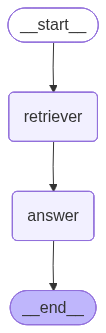

In [ ]:
from langgraph.graph import START, END

graph_builder.add_sequence([retriever, answer])
graph_builder.add_edge(START, "retriever")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()
graph

In [ ]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

##### RETRIEVER #####
[CONTEXT]
 SPRi AI Brief2025년 4월호
20
카카오, 자체 개발 AI 모델 ‘카나나’의 테크니컬 리포트 공개n카카오가 자체 개발 LLM ‘카나나’의 테크니컬 리포트를 공개하고, 카나나에 단계별 사전학습과 가지치기, 지식증류 등의 학습 기법을 적용해 학습 효율성을 극대화했다고 설명  n카카오는 연구 목적의 활용을 지원하기 위해 온디바이스 환경에서 작동될 수 있는 경량 모델 ‘카나나 나노 2.1B’를 오픈소스로 공개
KEY Contents
£카나나, 단계별 사전학습과 지식 증류 등의 학습 기법으로 학습 효율성 극대화n카카오가 2025년 2월 27일 자체 개발 언어모델 ‘카나나(Kanana)’의 구조와 학습 과정, 성능을 상세히 다룬 테크니컬 리포트*를 공개* Kanana: Compute-efficient Bilingual Language Models(https://arxiv.org/html/2502.18934v3/)∙카카오는 2024년 10월 개발자 컨퍼런스 ‘if(kakaoAI)2024’에서 카나나 언어모델 라인업(카나나 플래그, 에센스, 나노)을 처음 공개했으며, 2024년 말 카나나 플래그의 개발을 완료해 전체 라인업을 구축∙카카오에 따르면 카나나 플래그는 글로벌 최고 수준의 한국어·영어 성능을 보였으며, 특히 한국어 지식을 평가하는 벤치마크 KMMLU에서는 경쟁 모델을 압도하는 한국어 처리 성능을 달성** Kanana Flag 32.5B: 64.19, Qwen2.5B 32B: 59.37, Gemma2 27B: 49.98, EXAONE-3.5-32B: 55.44n카카오는 카나나의 학습 효율을 극대화하기 위해 단계별 사전학습(Staged Pre-training), 가지치기(Pruning)*, 지식 증류(Distillation)**와 같은 다양한 학습 기법을 적용했다고 설명*모델 구성 요소를 가지치기해 중요 요소만 남기는 기법  **큰 모델의 지식을 더 작은 모델로 전달하는 기법∙먼저 단계별 사전학습을

In [ ]:
from langchain.tools.retriever import create_retriever_tool

# 검색기, Tool 이름, Tool 설명(언제 이 툴을 써야 할지 설명)
retriever_tool = create_retriever_tool(
    ensemble_retriever,
    "retrieve_AI_brief",
    "Search and return information about AI Technology and Industry.",
)

tools = [retriever_tool]

In [ ]:
from langgraph.graph import StateGraph, MessagesState

graph_builder = StateGraph(MessagesState)

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

tool_node = ToolNode(tools=tools)
graph_builder.add_node("retriever", tool_node)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]} # 1) 도구 호출(tool_calls) 2) AI Message

graph_builder.add_node("chatbot", chatbot)

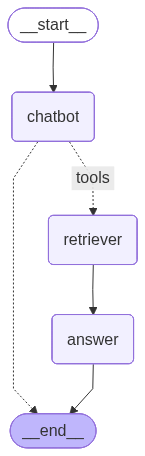

In [ ]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    {
        "tools" : "retriever",
        END: END
    }
)
graph_builder.add_node("answer", answer)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("retriever", "answer")
graph_builder.add_edge("answer", END)
graph = graph_builder.compile()
graph

In [ ]:
response = graph.invoke({"messages": "카나나의 테크니컬 리포트는 어떤 내용인가요?"})

for mes in response['messages']:
    mes.pretty_print()

================================ Human Message =================================

카나나의 테크니컬 리포트는 어떤 내용인가요?
================================== Ai Message ==================================

질문이 모호해서 두 가지 가능성을 함께 안내드릴게요.

1) 특정한 “카나나(Kanana)”의 테크니컬 리포트 내용을 원하시는지
- 어떤 카나나를 말씀하시는지(회사/프로젝트 이름 등)와 리포트의 정확한 제목이나 링크를 알려주시면 내용 요약이나 핵심 포인트를 정리해 드리겠습니다.
- 공개된 보고서의 경우 내용을 요약해 드릴 수 있고, 비공개 문서는 접근 권한이 필요하다는 점을 알려드립니다.

2) 일반적으로 테크니컬 리포트가 담고 있는 내용
- 초록/요약(Abstract): 연구의 목적, 주요 방법, 주요 결과를 간단하게 요약
- 서론(배경 및 목표): 문제 정의, 동기, 기존 연구와의 차별점
- 방법론/설계: 시스템 아키텍처, 알고리즘, 데이터 셋, 실험 설계 등의 구체적 방법
- 실험 및 결과: 실험 설정, 성능 지표, 그래프나 표를 통한 결과 제시, 해석
- 토의(한계와 해석): 얻은 결과의 한계점, 의의, 일반화 가능성
- 결론 및 향후 연구: 요약, 적용 가능성, 앞으로의 연구 방향
- 부록 및 참고문헌: 매개변수 설정, 추가 데이터, 인용 목록

원하시면 지금 바로 공개된 카나나 관련 테크니컬 리포트를 찾아 요약해 드리겠습니다. 검색을 진행해도 될까요? 검색 허용 시 링크나 제목을 알려주시면 거기에 맞춰 요점을 정리해 드리겠습니다.


In [ ]:
for chunk in graph.stream({"messages": "안녕하세요."}):
    for node, value in chunk.items():
        if node:
            print("=====", node, "=====")
        if "messages" in value:
            print(value['messages'][0].content)

===== chatbot =====
안녕하세요! 만나서 반갑습니다.  
무엇을 도와드릴까요? AI 기술이나 산업 동향, 특정 기술(챗봇, 머신러닝, 딥러닝 등)에 대한 설명이 필요하시면 말씀해 주세요. 원하시면 최신 정보나 간단한 요약도 검색해서 정리해 드리겠습니다. 어떻게 도와드릴까요?


# **5. 환각 여부를 평가하는 RAG**

<img src="https://blog.kakaocdn.net/dna/cbH1BW/btsQDGDjeF6/AAAAAAAAAAAAAAAAAAAAAD1nHS5umlxj-lmuCqR0YuDe0j5PgVVRieHu6sZt9609/img.png?credential=yqXZFxpELC7KVnFOS48ylbz2pIh7yKj8&expires=1759244399&allow_ip=&allow_referer=&signature=aU5zLsBytBPEWA54wD090IWe9Yc%3D">

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

OPENAI_API_KEY: ··········
TAVILY_API_KEY: ··········


### 1. Vector DB (문서 검색을 위한 Retriever 생성하기)

In [2]:
!pip -q install langchain_community langchain_experimental langchain_openai pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.75
    Uninstalling langchain-core-0.3.75:
      Successfully uninstalled langchain-core-0.3.75
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [4]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

file_path = "/content/drive/MyDrive/AI활용 소프트웨어 개발/14.AI Agent/필요 파일/SPRi AI Brief_4월호_산업동향_250407_F.pdf"

loader = PyPDFLoader(file_path)
pages = []

async for page in loader.alazy_load():
    pages.append(page)

text_splitter = SemanticChunker(OpenAIEmbeddings())

docs = text_splitter.split_documents(pages)

In [5]:
!pip -q install langchain_chroma

!pip -q install -U "opentelemetry-api==1.26.0" \
              "opentelemetry-sdk==1.26.0" \
              "opentelemetry-exporter-otlp-proto-grpc==1.26.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 1.9 MB/s eta 0

In [6]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

In [7]:
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})

In [10]:
!pip -q install langgraph

In [9]:
from langgraph.graph import MessagesState


class State(MessagesState):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        document: retrieved document
    """

    question: str
    generation: str
    document: str

### 2. Retriever 호출을 위한 Agent 와 Retriever

In [11]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_ai_policy_april_2025",
    "Search and return information from the April 2025 AI Policy Report, including global AI policies, legal regulations, major industry updates, technical research, education trends, and government strategies related to AI development.",
)

In [12]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def agent(state: State):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.
    """
    print("##### HI ! #####")
    messages = state["messages"]
    llm_with_tools = llm.bind_tools([retriever_tool]) # , tool_choice="any"
    response = llm_with_tools.invoke(messages)
    print("response", response)

    return {"messages": [response], "question" : messages[0].content}

In [13]:
def retrieve(state: State):
    """
    Retrieve documents
    """
    print("##### RETRIEVE #####")
    question = state["question"]

    document = retriever.invoke(question)


    return {"document": document[0].page_content, "question": question}

### 3. 관련성 평가

In [14]:
from pydantic import BaseModel, Field

class Grade(BaseModel):
    """Binary score for relevance check."""

    binary_score: str = Field(description="Relevance score 'yes' or 'no'")

In [15]:
from langchain import hub
from langchain_core.prompts import ChatPromptTemplate


def grade_documents(state: State):
    """
    Determines whether the retrieved document is relevant to the question.
    """

    print("##### CHECK RELEVANCE #####")

    grader = llm.with_structured_output(Grade)

    grader_prompt = ChatPromptTemplate.from_template(
        """
        You are a grader assessing relevance of a retrieved document to a user question. \n
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
        """
    )

    chain = grader_prompt | grader

    question = state["question"]
    print("state[messages]", state["messages"])

    document = state["document"]

    print("question", question)
    print("context", document)

    score = chain.invoke({"question": question, "context": document})
    print("context", document)
    grade = score.binary_score
    print("grade", grade)
    if grade == "yes":
        print("---GRADE: DOCUMENT RELEVANT---")
        return {"document": document, "question": question}
    else:
        print("---GRADE: DOCUMENT NOT RELEVANT---")
        return {"document": "", "question": question}

### 4. 답변 생성

In [16]:
def generate(state: State):
    """
    Generate answer based on the retrieved document and the question.
    """
    print("##### GENERATE #####")
    question = state["question"]
    document = state["document"]
    print("question", question)
    print("context", document)
    prompt = hub.pull("rlm/rag-prompt")

    response = llm.invoke(
        prompt.format_messages(context=document, question=question)
    )
    print("response", response)
    return {"documents": document, "question": question, "generation": response.content, "messages": [response]}

### 5. 질문 재작성

In [17]:
from langchain_core.messages import HumanMessage

def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("##### TRANSFORM QUERY #####")
    question = state["question"]

    system = """You a question re-writer that converts an input question to a better version that is optimized \n
     for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
    re_write_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            (
                "user",
                "Here is the initial question: \n\n {question} \n Formulate an improved question In Korean. ",
            ),
        ]
    )

    question_rewriter = re_write_prompt | llm

    better_question = question_rewriter.invoke({"question": question})
    print("question", question)
    print("better_question", better_question.content)
    return {"question": better_question.content, "messages": [better_question]}

### 6. Web Search Agent

In [18]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
web_search_agent = create_react_agent(llm, tools=[TavilySearchResults(max_results=3)])

/tmp/ipython-input-2664733417.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  web_search_agent = create_react_agent(llm, tools=[TavilySearchResults(max_results=3)])


### 7. 답변 생성 여부 결정

In [19]:
def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.
    """

    print("##### ASSESS GRADED DOCUMENTS #####")

    if state["document"] == "":
        print(
            "---DECISION: RETRIEVED DOCUMENT ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        print("---DECISION: GENERATE---")
        return "generate"

### 8. 답변 평가
답변 해결성 평가 (답변과 질문을 비교)

In [20]:
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


structured_llm_grader = llm.with_structured_output(GradeAnswer)

system = """You are a grader assessing whether an answer addresses / resolves a question \n
    If ambiguous, return no. \n
    Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("user", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

answer_grader = answer_prompt | structured_llm_grader

* 환각 평가 (문서와 답변을 비교하여 팩트 체크)

In [21]:
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )

structured_llm_grader = llm.with_structured_output(GradeHallucinations)

system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n
     Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("user", "Set of facts: \n\n {document} \n\n LLM generation: {generation}"),
    ]
)

hallucination_grader = hallucination_prompt | structured_llm_grader

* 환각 발생 : not supported
* 환각 X, 답변이 질문을 해결 X : not useful
* 환각 X, 답변이 질문을 해결 O : useful

In [22]:
def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.
    """

    print("##### CHECK HALLUCINATIONS #####")
    question = state["question"]
    document = state["document"]
    generation = state["generation"]

    score = hallucination_grader.invoke(
        {"document": document, "generation": generation}
    )
    grade = score.binary_score


    if grade == "yes": # 환각 없음
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes": # 답변이 질문을 해결함
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        else: # 답변이 질문을 해결하지 않음
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
    else: # 환각 있음
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

In [23]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

graph_builder.add_node("agent", agent)
graph_builder.add_node("web_search_agent", web_search_agent)
graph_builder.add_node("retrieve", retrieve)

graph_builder.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools": "retrieve",
        END: "web_search_agent",
    },
)
graph_builder.add_edge(START, "agent")
graph_builder.add_edge("web_search_agent", END)

In [24]:
graph_builder.add_node("grade_documents", grade_documents)
graph_builder.add_node("generate", generate)
graph_builder.add_node("transform_query", transform_query)

graph_builder.add_edge("retrieve", "grade_documents")
graph_builder.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
graph_builder.add_edge("transform_query", "retrieve")
graph_builder.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",
        "useful": END,
        "not useful": "transform_query",
    },
)

graph = graph_builder.compile()

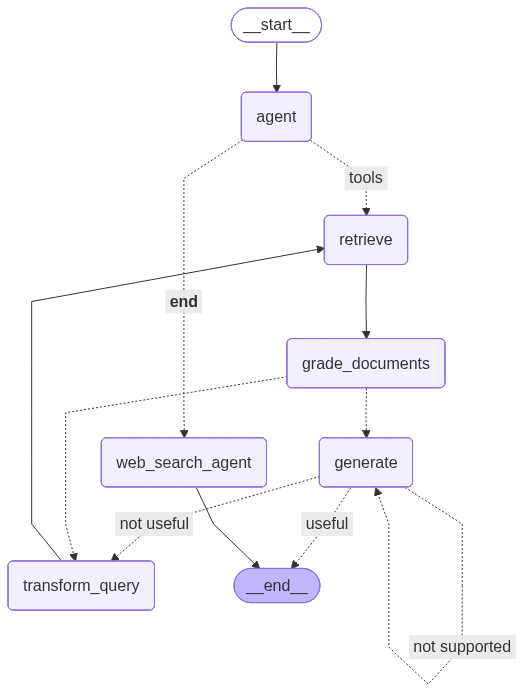

In [25]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

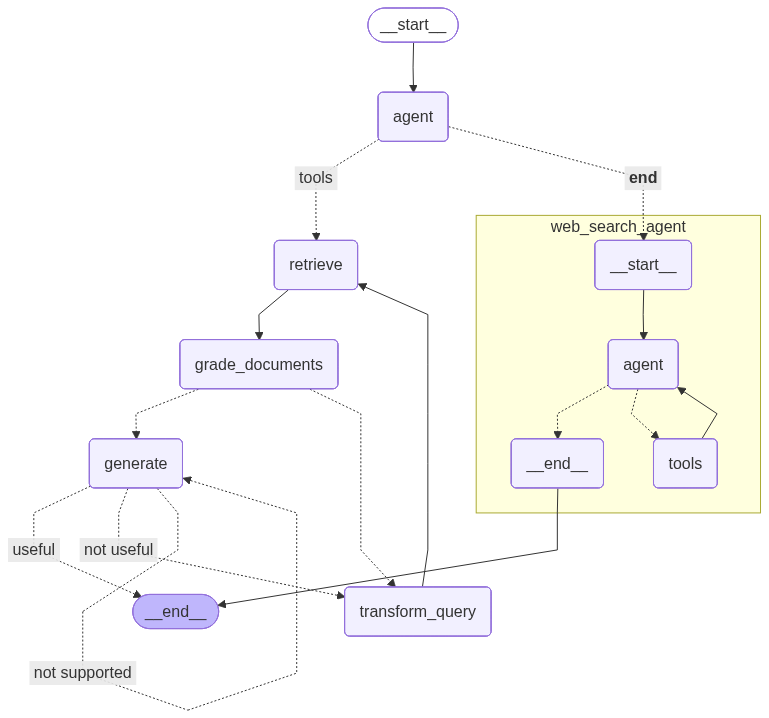

In [26]:
try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

### 9. 테스트
* case 1: 내부 문서 검색이 필요하지 않은 경우

In [27]:
from langgraph.errors import GraphRecursionError

inputs = {
    "messages": "2024년 노벨문학상 수상자는 누구인가요?"
}
try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

for msg in response["messages"]:
    msg.pretty_print()

##### HI ! #####
response content='2024년 노벨문학상 수상자는 아직 발표되지 않았습니다. 노벨문학상은 매년 10월에 발표되며, 2024년 수상자는 그 시점에 공개될 것입니다. 최신 정보를 확인하려면 노벨상 공식 웹사이트나 관련 뉴스를 참고하시기 바랍니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 107, 'total_tokens': 176, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CGxJSmIqL3EeNg1xAGlrENgqsB39K', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--73b665b0-10cb-4852-b4a3-c9bb1424cac8-0' usage_metadata={'input_tokens': 107, 'output_tokens': 69, 'total_tokens': 176, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
================================ Human Message ==============

* case 2: 내부 문서 검색이 필요한 경우

In [29]:
inputs = {
    "messages": "카카오가 개발한 모델에 대해 알려주세요."
}
try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

for msg in response["messages"]:
    msg.pretty_print()

##### HI ! #####
response content='' additional_kwargs={'tool_calls': [{'id': 'call_2cHXDOBC7pJauUJoPqOqJbtR', 'function': {'arguments': '{"query":"카카오 모델 개발"}', 'name': 'retrieve_ai_policy_april_2025'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 103, 'total_tokens': 126, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CGxJrFoGb1QnfkWMGo5uEhKR9NCRl', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--6646a71b-9e87-4209-ba1a-50a73b7165f2-0' tool_calls=[{'name': 'retrieve_ai_policy_april_2025', 'args': {'query': '카카오 모델 개발'}, 'id': 'call_2cHXDOBC7pJauUJoPqOqJbtR', 'type': 'tool_call'}] usage_metadata={'input_tokens': 103, 'output_toke

In [30]:
inputs = {
    "messages": "마누스 AI 에이전트에 대한 장단점"
}

try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

for msg in response["messages"]:
    msg.pretty_print()

##### HI ! #####
response content='' additional_kwargs={'tool_calls': [{'id': 'call_jhYiJgWjjhcDkBPS5dhaU8dY', 'function': {'arguments': '{"query":"마누스 AI 에이전트 장단점"}', 'name': 'retrieve_ai_policy_april_2025'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 105, 'total_tokens': 135, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CGxJzOsA2GbBPHEThBklCGq7oi5Cc', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--902fe8c3-7d7d-44c7-abf4-b823eaa05996-0' tool_calls=[{'name': 'retrieve_ai_policy_april_2025', 'args': {'query': '마누스 AI 에이전트 장단점'}, 'id': 'call_jhYiJgWjjhcDkBPS5dhaU8dY', 'type': 'tool_call'}] usage_metadata={'input_tokens': 105, 

* case 3: 부실한 사용자 쿼리를 재작성한 후 재 검색 및 답변

In [32]:
inputs = {
    "messages": "구글 AI AI AI"
}

try:
    response = graph.invoke(inputs)
except GraphRecursionError as e:
        print("Recursion Error")

for msg in response["messages"]:
    msg.pretty_print()

##### HI ! #####
response content='' additional_kwargs={'tool_calls': [{'id': 'call_Gai3WLdMuq8Ba2bINU4qU96t', 'function': {'arguments': '{"query":"구글 AI"}', 'name': 'retrieve_ai_policy_april_2025'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 97, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CGxKIjMRaVdar1m3Qj8UWPPilL1e5', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--e373fd00-84c9-4c7a-b7e9-ce7096fd251f-0' tool_calls=[{'name': 'retrieve_ai_policy_april_2025', 'args': {'query': '구글 AI'}, 'id': 'call_Gai3WLdMuq8Ba2bINU4qU96t', 'type': 'tool_call'}] usage_metadata={'input_tokens': 97, 'output_tokens': 22, '